# Environment
- pandas
- pyarrow or fastparquet

```shell
![pip][conda][pipenv] install pandas pyarrow numpy
```

In [1]:
import pandas as pd
import numpy as np
idx = pd.IndexSlice

import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
import sklearn 


from sklearn import preprocessing
from sklearn.cluster import KMeans

import scipy.stats as stats

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
positions_3d = "positions_3d.csv"
features = "features.parquet.gz"

In [3]:
#remove me!

# Positions

units: millimeters

In [4]:
positions_df = pd.read_csv(positions_3d, header=[0, 1], index_col=[0, 1, 2, 3]).astype(np.float16)

In [5]:
positions_df.head()

joint                              lear                 lelbow           \
variable                              x       y       z      x        y   
individual action   sample frame                                          
0          drinking 0      0      514.5 -355.50  2058.0  626.0  134.000   
                           1      515.0 -357.50  2060.0  626.0  134.000   
                           2      515.0 -357.50  2060.0  626.0  134.000   
                           3      515.0 -357.50  2060.0  626.0  134.000   
                           4      515.5 -359.75  2062.0  628.5  134.125   

joint                                       leye                 lshoulder  \
variable                               z       x       y       z         x   
individual action   sample frame                                             
0          drinking 0      0      1706.0  467.50 -369.00  2064.0     568.0   
                           1      1706.0  467.75 -371.00  2066.0     565.5   
                           2      1706.0  466.00 -373.25  2066.0     565.5   
                           3      1706.0  466.00 -373.25  2066.0     565.5   
                           4      1707.0  466.00 -373.25  2066.0     565.5   

joint                             ...  relbow    reye                  \
variable                          ...       z       x       y       z   
individual action   sample frame  ...                                   
0          drinking 0      0      ...  1678.0  366.50 -374.75  2070.0   
                           1      ...  1682.0  366.75 -377.00  2072.0   
                           2      ...  1682.0  366.75 -377.00  2072.0   
                           3      ...  1682.0  367.00 -379.25  2074.0   
                           4      ...  1682.0  367.00 -379.25  2074.0   

joint                            rshoulder                     rwrist          \
variable                                 x        y       z         x       y   
individual action   sample frame                                                
0          drinking 0      0       128.750 -72.9375  1891.0  42.84375  200.75   
                           1       128.875 -74.8750  1892.0  41.43750  200.00   
                           2       128.875 -74.8750  1892.0  41.43750  200.00   
                           3       128.875 -74.8750  1892.0  41.43750  200.00   
                           4       128.875 -74.8750  1892.0  41.43750  200.00   

joint                                     
variable                               z  
individual action   sample frame          
0          drinking 0      0      1469.0  
                           1      1473.0  
                           2      1473.0  
                           3      1473.0  
                           4      1473.0  

[5 rows x 33 columns]

In [6]:
positions_df.shape

(59941, 33)

In [7]:
positions_df.dtypes

joint      variable
lear       x           float16
           y           float16
           z           float16
lelbow     x           float16
           y           float16
           z           float16
leye       x           float16
           y           float16
           z           float16
lshoulder  x           float16
           y           float16
           z           float16
lwrist     x           float16
           y           float16
           z           float16
nose       x           float16
           y           float16
           z           float16
rear       x           float16
           y           float16
           z           float16
relbow     x           float16
           y           float16
           z           float16
reye       x           float16
           y           float16
           z           float16
rshoulder  x           float16
           y           float16
           z           float16
rwrist     x           float16
           y       

In [8]:
for i in range(positions_df.index.nlevels):
    index = positions_df.index.get_level_values(i).unique()
    print(index.name, ":", index, "\n")

individual : Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='individual') 

action : Index(['drinking', 'eat_crisp', 'open_close_bottle', 'rubiks_cube', 'sanitise',
       'touch_bottle', 'touch_rubiks_cube', 'transport_bottle',
       'transport_pen', 'transport_rubiks_cube'],
      dtype='object', name='action') 

sample : Int64Index([0, 1, 2], dtype='int64', name='sample') 

frame : Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            459, 460, 461, 462, 463, 464, 465, 466, 467, 468],
           dtype='int64', name='frame', length=469) 



In [9]:
for i in range(positions_df.columns.nlevels):
    col = positions_df.columns.get_level_values(i).unique()
    print(col.name, ":", col, "\n")

joint : Index(['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear',
       'relbow', 'reye', 'rshoulder', 'rwrist'],
      dtype='object', name='joint') 

variable : Index(['x', 'y', 'z'], dtype='object', name='variable') 



<AxesSubplot:>

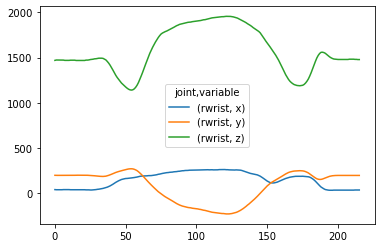

In [10]:
positions_df.loc[idx[0, "drinking", 0, :], idx["rwrist", :]].reset_index(drop=True).plot()

In [11]:
def plot_action(action, body, pearson):
    
    fig = plt.figure()
 
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    
    #rotazione di 180 rispetto a y e 180 rispetto a x
    ax.view_init(90,90)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    
    for i in range(0, len(body)):
        # defining all 3 axes
        z = positions_df.loc[idx[ pearson, action, 0, :], idx[body[i], "z"]]
        x = positions_df.loc[idx[ pearson, action, 0, :], idx[body[i], "x"]]
        y = positions_df.loc[idx[ pearson, action, 0, :], idx[body[i], "y"]]

        ax.plot3D(x, y, z)

    plt.show()
    


Di seguito i grafici che rappresentano l'azione di bere e di mangiare patatine, vediamo il comportamento dei due polsi e del naso per avere un riferimento con il viso, ci aspettiamo che i movimenti siano simili

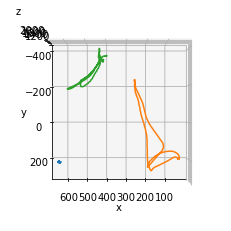

In [12]:
action = "drinking"
body = ["lwrist", "rwrist", "nose"]
plot_action(action,body,0)

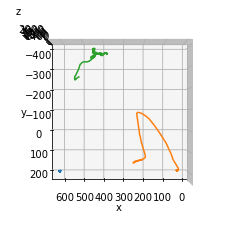

In [13]:
action = "eat_crisp"
plot_action(action,body,0)

I movimenti sono simili ma non del tutto, ci potrebbe essere una correlazione bassa, inoltre si nota che il polso sinistro rimane fermo in entrambi i casi, quindi lì la correlazione tra le due azioni è più alta

Di seguito i grafici che rappresentano l'azione di lavarsi le mani e di giocare con il cubo di rubik, vediamo il comportamento dei due polsi, gomiti e spalle e ci aspettiamo che i movimenti siano speculari tra i due polsi e simili tra le due azioni.

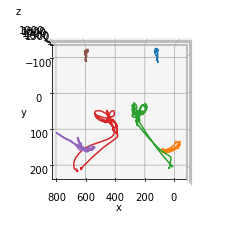

In [14]:
action = "sanitise"
body = ["rshoulder","relbow","rwrist", "lwrist", "lelbow", "lshoulder"]
plot_action(action,body,0)

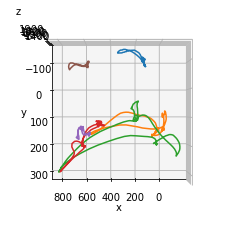

In [15]:
action = "rubiks_cube"
plot_action(action,body,0)

Le azioni non sono del tutto simili, probabilmente per la seconda azione c'è del rumore nato dal fatto che l'individuo ha preso il cubo dal tavolo e solo dopo ci ha giocato

Con molta probabilità i movimenti di tutte le componenti del viso per qualsiasi azione, saranno uguali ma con shift diversi, e anche i movimenti delle spalle perchè stanno sullo stesso asse, mentre i movimenti presi dai giunti delle braccia sono meno "rigidi"; per quanto riguarda le spalle abbiamo un esempio nei due grafici precedenti, vediamo che tracciano movimenti simili, ci potrebbe essere del rumore a causa di sovrapposizioni con altri nodi o perchè il nodo non è ben visibile dalla telecamera in quel momento. Di seguito, per alcuni movimenti, disegno i punti del viso:

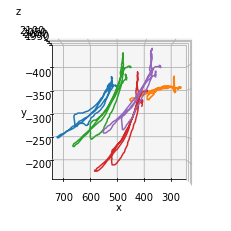

In [16]:
action = "drinking"
body = ["lear", "rear", "leye", "nose", "reye"] 
plot_action(action,body,0)

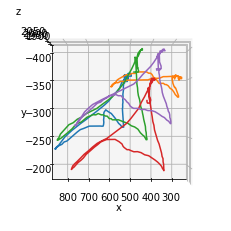

In [17]:
action = "transport_bottle"
#body = ["leye","nose","reye"] #problemi con l'orecchio sinistro
plot_action(action,body,0)

Ci aspettiamo una correlazione forte tra le varie azioni di trasporto.

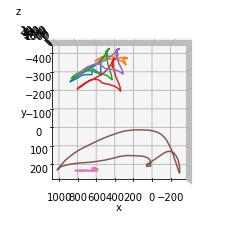

In [18]:
action = "transport_bottle"
body = ["lear", "rear","leye","nose","reye","rwrist", "lwrist"]
plot_action(action,body,0)

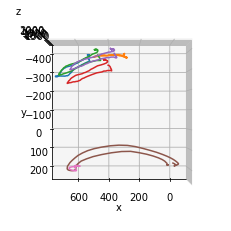

In [19]:
action = "transport_pen"
plot_action(action,body,0)

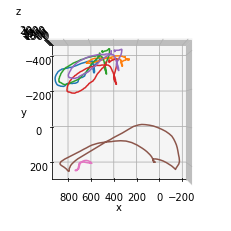

In [20]:
action = "transport_rubiks_cube"
plot_action(action,body,0)

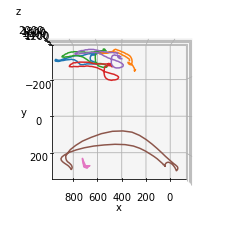

In [21]:
action = "transport_rubiks_cube"
plot_action(action,body,10)

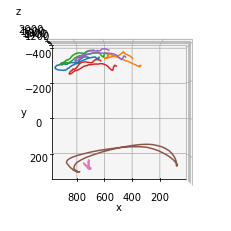

In [22]:
action = "touch_rubiks_cube"
plot_action(action,body,10)

# Features

units: meters and seconds

In [23]:
features_df = pd.read_parquet(features).applymap(lambda x: x.astype(np.float16))

In [24]:
features_df.head(1)

type_feature                                                       displacement  \
data                                                                  positions   
feature                                                        max_displacement   
variable                                                                      x   
joint person action   sample                                                      
lear  0      drinking 0       [0.015, 0.0205, 0.0285, 0.036, 0.044, 0.054, 0...   

type_feature                                                                     \
data                                                                              
feature                                                                           
variable                                                                      y   
joint person action   sample                                                      
lear  0      drinking 0       [0.02174, 0.02824, 0.03275, 0.03925, 0.04575, ...   

type_feature                                                                     \
data                                                                              
feature                                                                           
variable                                                                      z   
joint person action   sample                                                      
lear  0      drinking 0       [0.014, 0.017, 0.019, 0.022, 0.024, 0.025, 0.0...   

type_feature                                                                     \
data                                                                              
feature                                                                           
variable                                                              magnitude   
joint person action   sample                                                      
lear  0      drinking 0       [0.0299, 0.03882, 0.0474, 0.05762, 0.0679, 0.0...   

type_feature                                                                     \
data                                                                              
feature                                                      total_displacement   
variable                                                                      x   
joint person action   sample                                                      
lear  0      drinking 0       [0.015, 0.02, 0.028, 0.0355, 0.043, 0.053, 0.0...   

type_feature                                                                     \
data                                                                              
feature                                                                           
variable                                                                      y   
joint person action   sample                                                      
lear  0      drinking 0       [0.01525, 0.02374, 0.02824, 0.03476, 0.0435, 0...   

type_feature                                                                     \
data                                                                              
feature                                                                           
variable                                                                      z   
joint person action   sample                                                      
lear  0      drinking 0       [-0.008, -0.013, -0.015, -0.018, -0.022, -0.02...   

type_feature                                                                     \
data                                                                              
feature                                                                           
variable                                                              magnitude   
joint person action   sample                                                      
lear  0      drinking 0       [0.02284, 0.03366, 0.0425, 0.05283, 0.065, 0.0...   

type_fea

In [25]:
features_df.shape

(3520, 158)

In [26]:
features_df.dtypes

type_feature  data       feature             variable 
displacement  positions  max_displacement    x            object
                                             y            object
                                             z            object
                                             magnitude    object
                         total_displacement  x            object
                                                           ...  
dynamic       jerk       skewness            magnitude    object
                         kurtosis            x            object
                                             y            object
                                             z            object
                                             magnitude    object
Length: 158, dtype: object

In [27]:
type(features_df.iloc[0, 0])

numpy.ndarray

In [28]:
features_df.iloc[0, 0].dtype

dtype('float16')

In [29]:
for i in range(features_df.index.nlevels):
    print(features_df.index.get_level_values(i).unique())

Index(['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear',
       'relbow', 'reye', 'rshoulder', 'rwrist'],
      dtype='object', name='joint')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='person')
Index(['drinking', 'eat_crisp', 'open_close_bottle', 'rubiks_cube', 'sanitise',
       'touch_bottle', 'touch_rubiks_cube', 'transport_bottle',
       'transport_pen', 'transport_rubiks_cube'],
      dtype='object', name='action')
Int64Index([0, 1, 2], dtype='int64', name='sample')


In [30]:
for i in range(features_df.columns.nlevels):
    print(features_df.columns.get_level_values(i).unique())

Index(['displacement', 'frequency', 'dynamic'], dtype='object', name='type_feature')
Index(['positions', 'velocities', 'acceleration', 'jerk'], dtype='object', name='data')
Index(['max_displacement', 'total_displacement', 'peak_power_density',
       'entropy_power_density', 'sum_power_density', 'maximum',
       'third_quartile', 'second_quartile', 'first_quartile', 'minimum', 'iqr',
       'ptp', 'mean', 'variance', 'standard_deviation', 'skewness',
       'kurtosis'],
      dtype='object', name='feature')
Index(['x', 'y', 'z', 'magnitude'], dtype='object', name='variable')


In [31]:
type(features_df.loc[
    idx["rwrist", 0, "drinking", [0]],  # with [], get the Series
    idx["dynamic", "velocities", "mean", "magnitude"]
])

pandas.core.series.Series

In [32]:
type(features_df.loc[
    idx["rwrist", 0, "drinking", 0],  # without [], get the value
    idx["dynamic", "velocities", "mean", "magnitude"]
])

numpy.ndarray

<AxesSubplot:>

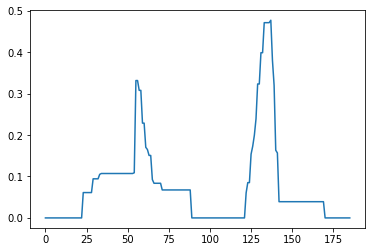

In [33]:
features_df.loc[
    idx["rwrist", 0, "drinking", [0]],
    idx["dynamic", "velocities", "minimum", "magnitude"]
].explode().reset_index(drop=True).plot()

ad esempio selezionare tutte le righe di una certa azione e calcolare corr di tutte le colonne rispetto a tutte le altre farlo divisa in gruppi di feature, ognuno un'azione

visualizzare il reacing rispetto al trasporto

test statistici

1.correlazione tra le feature della stessa azione(ci sono campioni di vari soggetti, si può guardare persona per persona)
-> formulazione di ipotesi da validare o meno nella seconda parte

2.test stat su azioni analoghe

3.ML: classificare i campioni (supervisionato): azione 1 vs azione 2

4: non supervisionato, clustering kmeans su coppie di azioni (bere e mangiare) con k=2, per visualizzare ridurre la dimensionalità con PCA con d=2 o 3

Su tutto o sulle 3 classi di feature separatamente


Ora possiamo calcolare le correlazioni delle ipotesi formulate nella prima parte:
* ipotesi 1 : azioni come bere e mangiare patatine sono simili, in particolare sappiamo che il braccio sinistro con compie quasi nessun movimento quindi la correlazione è più alta mentre, per il braccio destro che compie l'azione, per quanto il movimento sia simile, sarà meno correlato. Verifichiamo l'ipotesi in base alla velocità media del movimento

<AxesSubplot:>

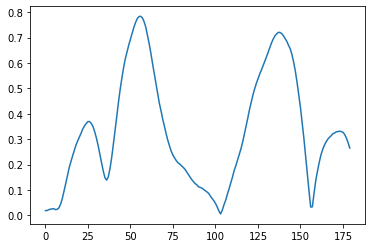

In [34]:
rd=features_df.loc[
    idx["rwrist", 0, "drinking", [0]],
    idx["displacement", "positions", "total_displacement", "magnitude"]
].explode().reset_index(drop=True)[:180]

rd.plot()

<AxesSubplot:>

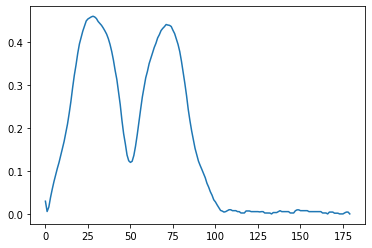

In [35]:
re=features_df.loc[
    idx["rwrist", 0, "eat_crisp", [0]],
    idx["displacement", "positions", "total_displacement", "magnitude"]
].explode().reset_index(drop=True)[:180]

re.plot()

In [36]:
np.corrcoef(rd.astype(float), re.astype(float))

array([[1.       , 0.0113011],
       [0.0113011, 1.       ]])

<AxesSubplot:>

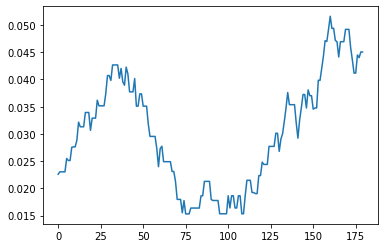

In [37]:
ld=features_df.loc[
    idx["lwrist", 0, "drinking", [0]],
    idx["dynamic", "velocities", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

ld.plot()

<AxesSubplot:>

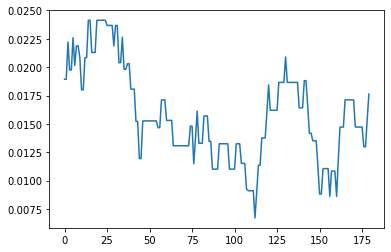

In [38]:
le=features_df.loc[
    idx["lwrist", 0, "eat_crisp", [0]],
    idx["dynamic", "velocities", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

le.plot()

In [39]:
np.corrcoef(ld.astype(float),le.astype(float))

array([[1.        , 0.25935081],
       [0.25935081, 1.        ]])

Dato che i movimenti del polso sinistro sono quasi impercettibili, rappresentandoli hanno molti scalini

* Ipotesi 2 : correlazione tra i giunti del viso nell'azione di bere

<AxesSubplot:>

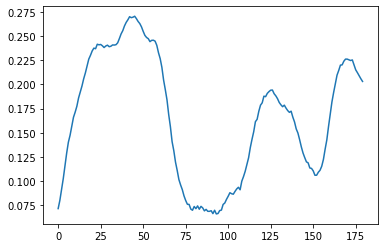

In [40]:
occhiodx=features_df.loc[
    idx["reye", 0, "drinking", [0]],
    idx["dynamic", "velocities", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

occhiodx.plot()

<AxesSubplot:>

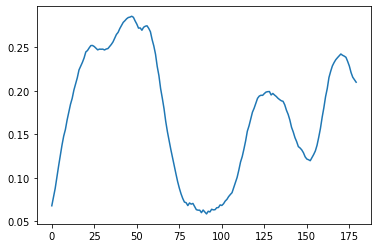

In [41]:
occhiosx=features_df.loc[
    idx["leye", 0, "drinking", [0]],
    idx["dynamic", "velocities", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

occhiosx.plot()

<AxesSubplot:>

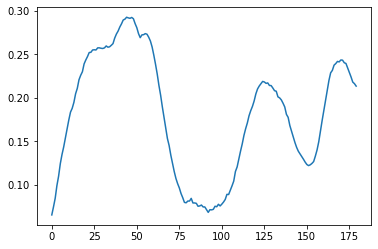

In [42]:
naso=features_df.loc[
    idx["nose", 0, "drinking", [0]],
    idx["dynamic", "velocities", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

naso.plot()

In [43]:
np.corrcoef(occhiodx.astype(float),occhiosx.astype(float))

array([[1.        , 0.99359146],
       [0.99359146, 1.        ]])

In [44]:
np.corrcoef(naso.astype(float),occhiodx.astype(float))

array([[1.        , 0.99380143],
       [0.99380143, 1.        ]])

In [45]:
np.corrcoef(naso.astype(float),occhiosx.astype(float))

array([[1.        , 0.99514411],
       [0.99514411, 1.        ]])

* Ipotesi 3: polso destro e sinistro fanno muovimenti correlati nell'azione sanitise

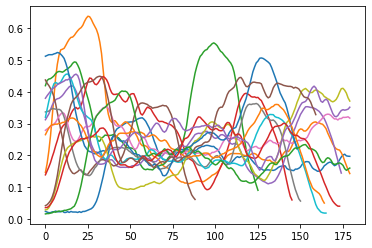

In [46]:
allrs = []

for i in range(0,16):
    allrs.append(features_df.loc[
        idx["rwrist", i, "sanitise", [0]],
        idx["dynamic", "velocities", "mean", "magnitude"]
    ].explode().reset_index(drop=True)[:180])


for i in range(0, len(allrs)):
    allrs[i].plot()




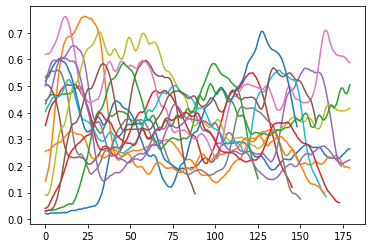

In [47]:
allls = []

for i in range(0,16):
    allls.append(features_df.loc[
    idx["lwrist", i, "sanitise", [0]],
    idx["dynamic", "velocities", "mean", "magnitude"]
    ].explode().reset_index(drop=True)[:180])

for i in range(0, len(allls)):
    allls[i].plot()

    

In [48]:
corr = []
for i in range(0, len(allrs)-1):
    corr.append(np.corrcoef(allrs[i].astype(float),allls[i].astype(float)))
print(corr)

[array([[1.        , 0.91205237],
       [0.91205237, 1.        ]]), array([[1.        , 0.90571877],
       [0.90571877, 1.        ]]), array([[1.        , 0.90907241],
       [0.90907241, 1.        ]]), array([[1.        , 0.39965494],
       [0.39965494, 1.        ]]), array([[1.        , 0.91136249],
       [0.91136249, 1.        ]]), array([[1.        , 0.95590279],
       [0.95590279, 1.        ]]), array([[1.        , 0.68713602],
       [0.68713602, 1.        ]]), array([[1.        , 0.82930952],
       [0.82930952, 1.        ]]), array([[ 1.        , -0.21764212],
       [-0.21764212,  1.        ]]), array([[1.        , 0.67233871],
       [0.67233871, 1.        ]]), array([[1.       , 0.8841038],
       [0.8841038, 1.       ]]), array([[1.        , 0.80865976],
       [0.80865976, 1.        ]]), array([[1.        , 0.78629308],
       [0.78629308, 1.        ]]), array([[1.        , 0.78450658],
       [0.78450658, 1.        ]]), array([[1.       , 0.7086531],
       [0.708653

* Ipotesi 4 : correlazione tra le azioni di trasporto

<AxesSubplot:>

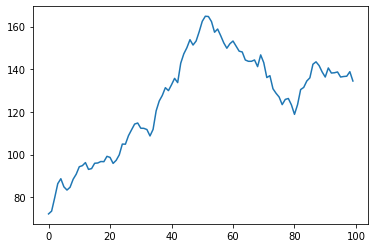

In [49]:
rtrc = features_df.loc[
    idx["rwrist", 0, "transport_rubiks_cube", [0]],
    idx["dynamic", "jerk", "mean", "magnitude"]
].explode().reset_index(drop=True)[:100]

rtrc.plot()

<AxesSubplot:>

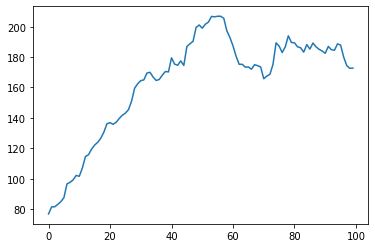

In [50]:
rtb = features_df.loc[
    idx["rwrist", 0, "transport_bottle", [0]],
        idx["dynamic", "jerk", "mean", "magnitude"]
].explode().reset_index(drop=True)[:100]

rtb.plot()

<AxesSubplot:>

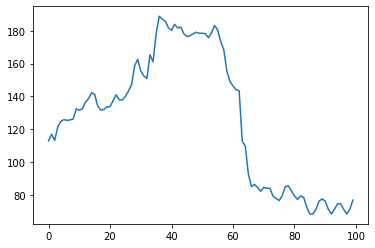

In [51]:
rtp = features_df.loc[
    idx["rwrist", 0, "transport_pen", [0]],
    idx["dynamic", "jerk", "mean", "magnitude"]
].explode().reset_index(drop=True)[:100]

rtp.plot()

In [52]:
np.corrcoef(rtrc.astype(float),rtb.astype(float))

array([[1.        , 0.91369116],
       [0.91369116, 1.        ]])

In [53]:
np.corrcoef(rtrc.astype(float),rtp.astype(float))

array([[1.        , 0.04468691],
       [0.04468691, 1.        ]])

In [54]:
np.corrcoef(rtb.astype(float),rtp.astype(float))

array([[ 1.        , -0.01729528],
       [-0.01729528,  1.        ]])

<AxesSubplot:>

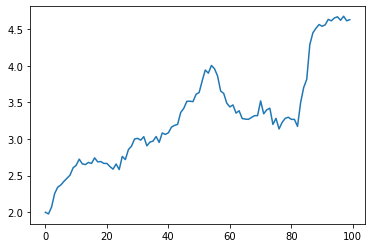

In [55]:
rtrc = features_df.loc[
    idx["rwrist", 0, "transport_rubiks_cube", [0]],
    idx["dynamic", "acceleration", "mean", "magnitude"]
].explode().reset_index(drop=True)[:100]

rtrc.plot()

<AxesSubplot:>

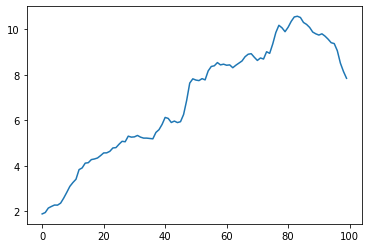

In [56]:
rtb = features_df.loc[
    idx["rwrist", 0, "transport_bottle", [0]],
        idx["dynamic", "acceleration", "mean", "magnitude"]
].explode().reset_index(drop=True)[:100]

rtb.plot()

<AxesSubplot:>

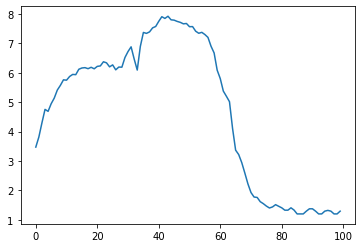

In [57]:
rtp = features_df.loc[
    idx["rwrist", 0, "transport_pen", [0]],
    idx["dynamic", "acceleration", "mean", "magnitude"]
].explode().reset_index(drop=True)[:100]

rtp.plot()

In [58]:
np.corrcoef(rtrc.astype(float),rtb.astype(float))

array([[1.        , 0.78930221],
       [0.78930221, 1.        ]])

In [59]:
np.corrcoef(rtrc.astype(float),rtp.astype(float))

array([[ 1.        , -0.44319951],
       [-0.44319951,  1.        ]])

In [60]:
np.corrcoef(rtb.astype(float),rtp.astype(float))

array([[ 1.       , -0.5946043],
       [-0.5946043,  1.       ]])

* Ipotesi 5 : le stesse azioni compiute da ogni individuo con la stessa parte del corpo dovrebbe essere fortemente correlata, ad esempio se prendiamo l'azione di bere e il polso destro per ogni individuo ci dovrebbe essere un'alta correlazione


[array([[ 1.        , -0.95919921],
       [-0.95919921,  1.        ]]), array([[ 1.        , -0.15262823],
       [-0.15262823,  1.        ]]), array([[ 1.        , -0.06223747],
       [-0.06223747,  1.        ]]), array([[ 1.        , -0.19010863],
       [-0.19010863,  1.        ]]), array([[1.        , 0.88197153],
       [0.88197153, 1.        ]]), array([[1.        , 0.58105976],
       [0.58105976, 1.        ]]), array([[1.        , 0.58536975],
       [0.58536975, 1.        ]]), array([[1.       , 0.0891538],
       [0.0891538, 1.       ]]), array([[ 1.        , -0.38617012],
       [-0.38617012,  1.        ]]), array([[ 1.        , -0.62325196],
       [-0.62325196,  1.        ]]), array([[1.        , 0.73473294],
       [0.73473294, 1.        ]]), array([[ 1.        , -0.14840779],
       [-0.14840779,  1.        ]]), array([[ 1.       , -0.6566924],
       [-0.6566924,  1.       ]]), array([[ 1.        , -0.14529319],
       [-0.14529319,  1.        ]])]


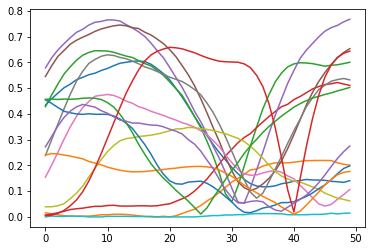

In [61]:
alldr = []

for i in range(0,15):
    alldr.append(features_df.loc[
        idx["rwrist", i, "touch_bottle", [0]],
        idx["displacement", "positions", "total_displacement", "magnitude"]
    ].explode().reset_index(drop=True)[:50])
#print(alldr)

for i in range(0, len(alldr)):
    alldr[i].plot()
    
corr = []
for i in range(0, len(alldr)-1):
    corr.append(np.corrcoef(alldr[i].astype(float), alldr[i+1].astype(float)))
print(corr)

[array([[1.        , 0.76974105],
       [0.76974105, 1.        ]]), array([[1.        , 0.51438792],
       [0.51438792, 1.        ]]), array([[ 1.        , -0.26170825],
       [-0.26170825,  1.        ]]), array([[ 1.        , -0.68582191],
       [-0.68582191,  1.        ]]), array([[ 1.        , -0.62701438],
       [-0.62701438,  1.        ]]), array([[1.        , 0.80921545],
       [0.80921545, 1.        ]]), array([[ 1.        , -0.41324158],
       [-0.41324158,  1.        ]]), array([[1.        , 0.26304347],
       [0.26304347, 1.        ]]), array([[ 1.        , -0.18313628],
       [-0.18313628,  1.        ]]), array([[1.        , 0.75684551],
       [0.75684551, 1.        ]]), array([[1.        , 0.83234398],
       [0.83234398, 1.        ]]), array([[1.        , 0.72649225],
       [0.72649225, 1.        ]]), array([[1.        , 0.88753862],
       [0.88753862, 1.        ]]), array([[1.        , 0.57431098],
       [0.57431098, 1.        ]])]


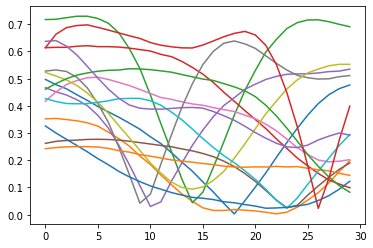

In [62]:
alldr = []

for i in range(0,15):
    alldr.append(features_df.loc[
        idx["rwrist", i, "touch_bottle", [1]],
        idx["displacement", "positions", "total_displacement", "magnitude"]
    ].explode().reset_index(drop=True)[:30])


for i in range(0, len(alldr)):
    alldr[i].plot()
    
corr = []
for i in range(0, len(alldr)-1):
    corr.append(np.corrcoef(alldr[i].astype(float), alldr[i+1].astype(float)))
print(corr)

<AxesSubplot:>

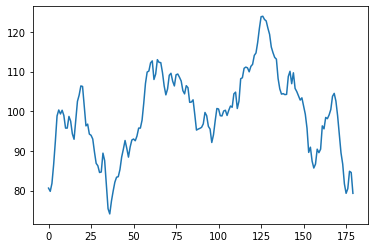

In [63]:
jm = features_df.loc[
    idx["rwrist", 0, "drinking", [0]],
    idx["dynamic", "jerk", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

jm.plot()

<AxesSubplot:>

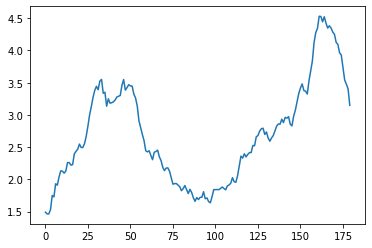

In [64]:
am = features_df.loc[
    idx["rwrist", 0, "drinking", [0]],
    idx["dynamic", "acceleration", "mean", "magnitude"]
].explode().reset_index(drop=True)[:180]

am.plot()

In [65]:
np.corrcoef(jm.astype(float),am.astype(float))

array([[ 1.        , -0.30297442],
       [-0.30297442,  1.        ]])

In [66]:
np.corrcoef(am.astype(float),jm.astype(float))

array([[ 1.        , -0.30297442],
       [-0.30297442,  1.        ]])

<AxesSubplot:>

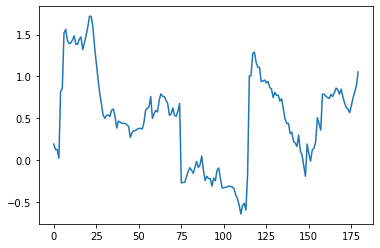

In [67]:
dask = features_df.loc[
    idx["rwrist", 0, "drinking", [0]],
    idx["dynamic", "acceleration", "skewness", "magnitude"]
].explode().reset_index(drop=True)[:180]

dask.plot()

<AxesSubplot:>

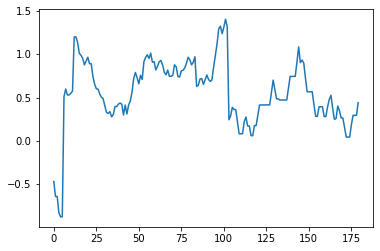

In [68]:
eask = features_df.loc[
    idx["rwrist", 0, "eat_crisp", [0]],
    idx["dynamic", "acceleration", "skewness", "magnitude"]
].explode().reset_index(drop=True)[:180]

eask.plot()

In [69]:
np.corrcoef(dask.astype(float), eask.astype(float))

array([[ 1.        , -0.03043803],
       [-0.03043803,  1.        ]])

<hr>

Ad esempio selezionare tutte le righe di una certa azione e calcolare corr di tutte le colonne rispetto a tutte le altre farlo divisa in gruppi di feature, ognuno un'azione

visualizzare il reacing rispetto al trasporto

test statistici

1.correlazione tra le feature della stessa azione(ci sono campioni di vari soggetti, si può guardare persona per persona)
-> formulazione di ipotesi da validare o meno nella seconda parte

2.test stat su azioni analoghe

3.ML: classificare i campioni (supervisionato): azione 1 vs azione 2

4: non supervisionato, clustering kmeans su coppie di azioni (bere e mangiare) con k=2, per visualizzare ridurre la dimensionalità con PCA con d=2 o 3

4-bis: non supervisionato, clustering su azioni con k = #persone 

Su tutto o sulle 3 classi di feature separatamente

### Correlazione

Prendo in considerazione il movimento del braccio destro nel trasporto della penna e calcolo la correlazione tra le varie feature della persona 0

In [70]:
transport_df = features_df.loc[idx["rwrist", 0, "transport_pen", 0]].reset_index(drop=True)
corr = []
for a in transport_df:
    corr.append(a[:100])
corrs = np.corrcoef(corr)

print(corrs)



[[1.         0.8871161  0.84535899 ... 0.29328203 0.65747638 0.64119909]
 [0.8871161  1.         0.93929837 ... 0.12836659 0.58217357 0.63664607]
 [0.84535899 0.93929837 1.         ... 0.30290373 0.67869331 0.73688009]
 ...
 [0.29328203 0.12836659 0.30290373 ... 1.         0.71213964 0.66768219]
 [0.65747638 0.58217357 0.67869331 ... 0.71213964 1.         0.97777131]
 [0.64119909 0.63664607 0.73688009 ... 0.66768219 0.97777131 1.        ]]


La matrice delle correlazioni ha dimensioni notevoli e non può essere visulizzata per intero, quindi la "navigo", per visualizzare in particolare la correlazione tra due feature. In particolare ci aspettiamo che le feature legate a un macro-gruppo siano molto correlate tra loro:

In [71]:
def corr_matrix(f1,f2,action):
    for i in range(16):
        person = features_df.loc[idx['rwrist', i, action, 0]]
        v = []

        index = (person.index)
        person = person.reset_index(drop=True)

        for a in person:
            v.append(a[:50])

        corrs = np.corrcoef(v)
        print(
            f"Persona {i} : {corrs[np.argwhere(index == idx[f1]), np.argwhere(index == idx[f2])] } "
        )
    return corrs



In [72]:
f1 ='displacement', 'positions', 'total_displacement', 'magnitude'
f2 ='displacement', 'positions', 'max_displacement', 'magnitude'
corr = corr_matrix(f1,f2, 'transport_pen')


Persona 0 : [[0.95262732]] 
Persona 1 : [[0.99802477]] 
Persona 2 : [[0.7483612]] 
Persona 3 : [[0.94988572]] 
Persona 4 : [[0.97456914]] 
Persona 5 : [[0.99421071]] 
Persona 6 : [[0.97951456]] 
Persona 7 : [[0.99600001]] 
Persona 8 : [[0.99542338]] 
Persona 9 : [[0.98724193]] 
Persona 10 : [[0.97770561]] 
Persona 11 : [[0.99825089]] 
Persona 12 : [[0.98796389]] 
Persona 13 : [[0.97508586]] 
Persona 14 : [[0.99403054]] 
Persona 15 : [[0.99120909]] 


/home/vale/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/vale/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/vale/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Si nota che il max e il total displcement sono molto correlati per tutti gli individui

In [73]:
f1 ='dynamic', 'acceleration', 'mean', 'magnitude'
f2 = 'dynamic', 'jerk', 'mean', 'magnitude'
corr = corr_matrix(f1,f2, 'transport_pen')

Persona 0 : [[0.91788493]] 
Persona 1 : [[0.94016424]] 
Persona 2 : [[0.80612486]] 
Persona 3 : [[-0.15594425]] 
Persona 4 : [[0.72139188]] 
Persona 5 : [[0.84916629]] 
Persona 6 : [[-0.14000818]] 
Persona 7 : [[0.42637403]] 
Persona 8 : [[0.96290034]] 
Persona 9 : [[0.87833549]] 
Persona 10 : [[0.81986395]] 
Persona 11 : [[0.97923968]] 
Persona 12 : [[0.87201592]] 
Persona 13 : [[0.9722633]] 
Persona 14 : [[0.93391575]] 
Persona 15 : [[0.9854448]] 


Si nota che le feature non sono correlate allo stesso modo per tutte le persone, ma la maggior parte in questo caso ha una correlazione alta tra accelerazione e jerk medio.

Ora valutiamo la correlazione delle stesse feature nelle altre due azioni di trasporto

In [74]:
f1 ='displacement', 'positions', 'total_displacement', 'magnitude'
f2 ='displacement', 'positions', 'max_displacement', 'magnitude'
corr = corr_matrix(f1,f2, 'transport_bottle')

Persona 0 : [[0.90033165]] 
Persona 1 : [[0.99499525]] 
Persona 2 : [[0.85753725]] 
Persona 3 : [[0.39666813]] 
Persona 4 : [[0.88640882]] 
Persona 5 : [[0.99740934]] 
Persona 6 : [[0.90777169]] 
Persona 7 : [[0.9974273]] 
Persona 8 : [[0.98414126]] 
Persona 9 : [[0.97677584]] 
Persona 10 : [[0.96175939]] 
Persona 11 : [[0.8298649]] 
Persona 12 : [[0.96822456]] 
Persona 13 : [[0.99931808]] 
Persona 14 : [[0.98741018]] 
Persona 15 : [[0.98174446]] 


In [75]:
f1 ='dynamic', 'jerk', 'mean', 'magnitude'
f2 = 'dynamic', 'acceleration', 'mean', 'magnitude'
corr = corr_matrix(f1,f2, 'transport_bottle')

Persona 0 : [[0.97886519]] 
Persona 1 : [[0.91199061]] 
Persona 2 : [[0.88372408]] 
Persona 3 : [[0.94383906]] 
Persona 4 : [[0.97811248]] 
Persona 5 : [[0.21732195]] 
Persona 6 : [[0.86118309]] 
Persona 7 : [[0.95775659]] 
Persona 8 : [[0.97496063]] 
Persona 9 : [[0.98263728]] 
Persona 10 : [[0.94492801]] 
Persona 11 : [[0.48282055]] 
Persona 12 : [[0.77243348]] 
Persona 13 : [[0.96960458]] 
Persona 14 : [[0.97017606]] 
Persona 15 : [[0.94504461]] 


Nel trasporto della bottiglia le feature sono molto correlate per tutti gli individui

In [76]:
f1 ='displacement', 'positions', 'total_displacement', 'magnitude'
f2 ='displacement', 'positions', 'max_displacement', 'magnitude'
corr = corr_matrix(f1,f2, 'transport_rubiks_cube')

Persona 0 : [[0.98503835]] 
Persona 1 : [[0.89943362]] 
Persona 2 : [[0.96468497]] 
Persona 3 : [[0.92079516]] 
Persona 4 : [[0.99070513]] 
Persona 5 : [[0.99405191]] 
Persona 6 : [[0.99642129]] 
Persona 7 : [[0.97508444]] 
Persona 8 : [[0.98724687]] 
Persona 9 : [[0.90918861]] 
Persona 10 : [[0.98819292]] 
Persona 11 : [[0.99973967]] 
Persona 12 : [[0.92156605]] 
Persona 13 : [[0.94361566]] 
Persona 14 : [[0.95864182]] 
Persona 15 : [[0.98803274]] 


In [77]:
f1 ='dynamic', 'jerk', 'mean', 'magnitude'
f2 = 'dynamic', 'acceleration', 'mean', 'magnitude'
corr = corr_matrix(f1,f2, 'transport_rubiks_cube')

Persona 0 : [[0.95909704]] 
Persona 1 : [[0.69463805]] 
Persona 2 : [[0.92043481]] 
Persona 3 : [[-0.10187552]] 
Persona 4 : [[0.73268419]] 
Persona 5 : [[0.82193712]] 
Persona 6 : [[0.77211546]] 
Persona 7 : [[0.84371341]] 
Persona 8 : [[0.86843586]] 
Persona 9 : [[0.97007733]] 
Persona 10 : [[0.52977801]] 
Persona 11 : [[0.9903544]] 
Persona 12 : [[0.86033333]] 
Persona 13 : [[0.94461425]] 
Persona 14 : [[0.67165361]] 
Persona 15 : [[0.92838817]] 


### T-Test

Le azioni di traporto e quelle di raggiungere sono analoghe, è possibile fare dei test statistici per controllare quanto sia vero; formuliamo un' ipotesi relativa a quanto siano legate la prima fase del trasporto con l'azione di toccare un oggetto:
* H0 = la prima parte dell'azione del trasporto è uguale a quella di toccare
* HA = le due azioni sono differenti

Usiamo il t-test per valutare le due ipotesi; in particolare valutiamo le due azioni rispetto alle feature legate al displacement.
Per coerenza userò il trasporto e il  raggiungimento del cubo di rubik

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.



In [78]:
transport_rc = features_df.loc[
    idx["rwrist", :, "transport_rubiks_cube", :],
    idx['displacement', 'positions', 'total_displacement', 'magnitude']
].explode().reset_index(drop=True)

transport_rc.shape

(3905,)

In [79]:
touch_rc = features_df.loc[
    idx["rwrist", :, "touch_rubiks_cube", :],
    idx['displacement', 'positions', 'total_displacement', 'magnitude']
].explode().reset_index(drop=True)

touch_rc.shape

(3104,)

Quindi in questo caso abbiamo che:
1. il campione è n = 32
2. N è circa 3000
3. n*10 = 320 campioni

In [80]:
touch_rc = features_df.loc[
    idx["rwrist", :, "touch_rubiks_cube", :],
    idx['dynamic', 'velocities', 'mean', 'x']
].explode().reset_index(drop=True)[:320]

touch_rc.shape

(320,)

In [81]:
transport_rc = features_df.loc[
    idx["rwrist", :, "transport_rubiks_cube", :],
    idx['dynamic', 'velocities', 'mean', 'x']
].explode().reset_index(drop=True)[:320]

transport_rc.shape

(320,)

In [82]:
t_statistic, p_value = stats.ttest_1samp(a= transport_rc, popmean= touch_rc.mean(), alternative='two-sided')
print("t-statistic: ",t_statistic)
print("p-value: ",p_value)

t-statistic:  -0.10154218732069906
p-value:  0.9191838639686636


Livello di siginificatività : 0.05
Livello di confidenza: 95%

Dato che il p-value è minore del livello di significatività allora possiamo rigettare l'ipotesi alternativa in favore di quella nulla (il contrario?)



* ipotesi nulla : le azioni di trasporto bottiglia e trasporto penna sono uguali
* ipotesi alternativa: le azioni di traporto bottiglia e penna sono diverse


In [83]:
transport_b = features_df.loc[
    idx["rwrist", :, "transport_bottle", :],
    idx['dynamic', 'velocities', 'mean', 'x']
].explode().reset_index(drop=True)[:320]

transport_b.shape

(320,)

In [84]:
transport_p = features_df.loc[
    idx["rwrist", :, "transport_pen", :],
    idx['dynamic', 'velocities', 'mean', 'x']
].explode().reset_index(drop=True)[:320]

transport_p.shape

(320,)

In [85]:
t_statistic, p_value = stats.ttest_1samp(a= transport_p, popmean= transport_b.mean(), alternative='two-sided')
print("t-statistic: ",t_statistic)
print("p-value: ",p_value)

t-statistic:  -1.3258880481791375
p-value:  0.18582540688389038


p_value<0.5 si rigetta l'ipotesi nulla in favore di quella alternativa

* ipotesi nulla : le azioni di trasporto bottiglia e trasporto cubo di rubik sono uguali
* ipotesi alternativa: le azioni di traporto bottiglia e cubo di rubik sono diverse

In [86]:
t_statistic, p_value = stats.ttest_1samp(a= transport_b, popmean= transport_rc.mean(), alternative='two-sided')
print("t-statistic: ",t_statistic)
print("p-value: ",p_value)

t-statistic:  -0.4776734891980774
p-value:  0.6332097501683287


p_value<0.5 si rigetta l'ipotesi nulla in favore di quella alternativa

* ipotesi nulla : le azioni di trasporto penna e trasporto cubo di rubik sono uguali
* ipotesi alternativa: le azioni di traporto penna e cubo di rubik sono diverse

In [87]:
t_statistic, p_value = stats.ttest_1samp(a= transport_rc, popmean= transport_p.mean(), alternative='two-sided')
print("t-statistic: ",t_statistic)
print("p-value: ",p_value)

t-statistic:  1.9112444033803653
p-value:  0.056869157040538326


p_value>0.5 si rigetta l'ipotesi alternativa in favore di quella nulla


Quindi alla luce dei vari test statistici effettuati, possiamo dire che le uniche azioni simili tra loro sono il trasporto della penna e del cubo di rubik

### ML - supervisionato

Possiamo usare un algoritmo di regressione logistica per classificare se un'azione è relativa al trasporto o al tocco

Passi da seguire:

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale. 

In [88]:
"""
X_train = features_df.loc[idx["rwrist", :, "transport_rubiks_cube", [0]],
    idx['displacement', 'positions', 'total_displacement', 'magnitude']].explode().reset_index(drop=True)

X_test = features_df.loc[idx["rwrist", :, "transport_rubiks_cube", [1]],
    idx['displacement', 'positions', 'total_displacement', 'magnitude']].explode().reset_index(drop=True)


#Data_type = type(trasporto)
#np_trasporto = np.array(trasporto, dtype=Data_type)


#features_df.loc[(features_df.index.get_level_values('action') == "transport_rubiks_cube")]

actions = "transport_rubiks_cube"
X.loc[idx[joints, :, actions, 0]].reset_index()['action']

t = []
t = features_df.loc[(features_df.index.get_level_values('action') == "transport_rubiks_cube")]

print(type(t))
print("........................")
print(type(features_df.iloc[[0],:]))
      
isTransport = []
#for i in features_df.index.get_level_values('action'):
for i in (0, 3519):
    isTransport[i] = (features_df.iloc[[i],:] == t)
        
#print(filter)



regressor = LogisticRegression()

regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

"""

'\nX_train = features_df.loc[idx["rwrist", :, "transport_rubiks_cube", [0]],\n    idx[\'displacement\', \'positions\', \'total_displacement\', \'magnitude\']].explode().reset_index(drop=True)\n\nX_test = features_df.loc[idx["rwrist", :, "transport_rubiks_cube", [1]],\n    idx[\'displacement\', \'positions\', \'total_displacement\', \'magnitude\']].explode().reset_index(drop=True)\n\n\n#Data_type = type(trasporto)\n#np_trasporto = np.array(trasporto, dtype=Data_type)\n\n\n#features_df.loc[(features_df.index.get_level_values(\'action\') == "transport_rubiks_cube")]\n\nactions = "transport_rubiks_cube"\nX.loc[idx[joints, :, actions, 0]].reset_index()[\'action\']\n\nt = []\nt = features_df.loc[(features_df.index.get_level_values(\'action\') == "transport_rubiks_cube")]\n\nprint(type(t))\nprint("........................")\nprint(type(features_df.iloc[[0],:]))\n      \nisTransport = []\n#for i in features_df.index.get_level_values(\'action\'):\nfor i in (0, 3519):\n    isTransport[i] = (feat

In [89]:
"""

#features_df["isTransport"] = False

X = features_df.loc[idx[:, :, ["transport_rubiks_cube", "touch_rubiks_cube"], [0]]]

#y = X.reset_index()['action']

azioni = X.reset_index()['action']

print(azioni[5]=="transport_rubiks_cube")

for i in range(0,351):
    X["isTransport"][i] = (azioni[i]=="transport_rubiks_cube")

y = X["isTransport"]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

reg = LogisticRegression().fit(X_train,y_train)


reg.fit(X_train, y_train)
reg.score(X_test,y_test)

'''

for i in range(0,300):
    if(Azioni[i]=="touch_bottle"):
        X["cakka"][i] = False
    else:
        X["cakka"][i] = True
'''
"""

'\n\n#features_df["isTransport"] = False\n\nX = features_df.loc[idx[:, :, ["transport_rubiks_cube", "touch_rubiks_cube"], [0]]]\n\n#y = X.reset_index()[\'action\']\n\nazioni = X.reset_index()[\'action\']\n\nprint(azioni[5]=="transport_rubiks_cube")\n\nfor i in range(0,351):\n    X["isTransport"][i] = (azioni[i]=="transport_rubiks_cube")\n\ny = X["isTransport"]\n    \nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)\n\nreg = LogisticRegression().fit(X_train,y_train)\n\n\nreg.fit(X_train, y_train)\nreg.score(X_test,y_test)\n\n\'\'\'\n\nfor i in range(0,300):\n    if(Azioni[i]=="touch_bottle"):\n        X["cakka"][i] = False\n    else:\n        X["cakka"][i] = True\n\'\'\'\n'

In [90]:
#X.head(5)

In [91]:
#X = features_df.loc[idx[:, :, ["transport_rubiks_cube", "touch_rubiks_cube"]], idx[["displacement", "frequency"]]]


joints = ['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear','relbow', 'reye', 'rshoulder', 'rwrist']
actions = ['touch_bottle', 'transport_bottle']

#for i in range (0,len(actions)):
#    plt.scatter(X['displacement'][np.where(features_df.index.get_level_values(2).name==actions[i])[0]], X['displacement'][np.where(features_df.index.get_level_values(2).name==actions[i])[0]])


In [92]:
def my_train_test_slipt(X, joints, actions):
    n_features = X.columns.size
    n_joints = len(joints)
    n_people = 16
    n_actions = len(actions)
    n_samples = 50
    
    tr = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index(drop=True))
    te = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index(drop=True))
    y_train = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index()['action'])
    y_test = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index()['action'])

    y_train_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
    y_test_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
    X_train = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)
    X_test = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)
    
    for z in range(int(len(tr))):
        for j in range(len(tr[z])):
            for i in range(n_samples):
                X_train[z, j, i] = tr[z][j][-i]
        for i in range(n_samples):
            y_train_fixed[z * n_samples + i] = y_train[z]

    for z in range(int(len(te))):
        for j in range(len(te[z])):
            for i in range(n_samples):
                X_test[z, j, i] = te[z][j][-i]
        for i in range(n_samples):
            y_test_fixed[z * n_samples + i] = y_test[z]
    
    X_train = X_train.reshape(-1, n_features)
    X_test = X_test.reshape(-1, n_features)
    
    if np.where(y_train_fixed == ''):
        return X_train, X_test, y_train_fixed, y_test_fixed
    else : 
        print("Ci sono degli elementi nulli")

In [93]:
"""
X.loc[idx[:, :, actions], idx[["displacement", "frequency"]]].reset_index()['action']

n_features = X.columns.size
n_joints = len(joints)
n_people = 16
n_actions = len(actions)
n_samples = 60

tr = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index(drop=True))
te = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index(drop=True))
y_train = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index()['action'])
y_test = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index()['action'])

y_train_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
y_test_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
X_train = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)
X_test = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)

for z in range(int(len(tr))):
    for j in range(len(tr[z])):
        for i in range(n_samples):
            X_train[z, j, i] = tr[z][j][i]
    for i in range(n_samples):
        y_train_fixed[z * n_samples + i] = y_train[z]

for z in range(int(len(te))):
    for j in range(len(te[z])):
        for i in range(n_samples):
            X_test[z, j, i] = te[z][j][i]
    for i in range(n_samples):
        y_test_fixed[z * n_samples + i] = y_test[z]

X_train = X_train.reshape(-1, n_features)
X_test = X_test.reshape(-1, n_features)

#X_train = PCA(n_components=n_features).fit_transform(X_train)
#X_test = PCA(n_components=n_features).fit_transform(X_test)

np.where(y_train_fixed == '')
"""


#joints = ['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear','relbow', 'reye', 'rshoulder', 'rwrist']
joints = ['nose', 'rwrist']
actions = ['transport_rubiks_cube', 'touch_rubiks_cube']

X = features_df.loc[idx[joints, :, actions, :],idx[['displacement', 'frequency']]]
"""
n_features = X.columns.size
n_joints = len(joints)
n_people = 16
n_actions = len(actions)
n_samples = 50

tr = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index(drop=True))
te = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index(drop=True))
y_train = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index()['action'])
y_test = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index()['action'])

y_train_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
y_test_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
X_train = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)
X_test = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)


print(len(tr), len(tr[10]), n_samples, len(X_train), (n_people * n_actions),(n_joints * n_features) )

for z in range(int(len(tr))):
    for j in range(len(tr[z])):
        for i in range(n_samples):
            X_train[z, j, i] = tr[z][j][-i]
    for i in range(n_samples):
        y_train_fixed[z * n_samples + i] = y_train[z]

for z in range(int(len(te))):
    for j in range(len(te[z])):
        for i in range(n_samples):
            X_test[z, j, i] = te[z][j][-i]
    for i in range(n_samples):
        y_test_fixed[z * n_samples + i] = y_test[z]

X_train = X_train.reshape(-1, n_features)
X_test = X_test.reshape(-1, n_features)

#X_train = PCA(n_components=n_features).fit_transform(X_train)
#X_test = PCA(n_components=n_features).fit_transform(X_test)

np.where(y_train_fixed == '')
"""

X_train,X_test,y_train_fixed,y_test_fixed = my_train_test_slipt(X, joints, actions)

In [94]:
regressor = LogisticRegression()

regressor.fit(X_train,y_train_fixed)
regressor.score(X_test,y_test_fixed)




0.5009375

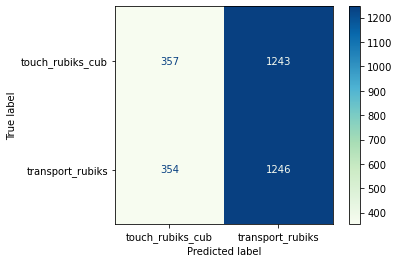

In [95]:

ConfusionMatrixDisplay.from_estimator(regressor, X_test, y_test_fixed, cmap='GnBu')

Esplorazione dati

Test statistici

Modelli predittivi

Raggruppare le feature in un certo istante di tempo oppure lavorare su finestre temporali

Usiamo ora un algoritmo di regressione logistica per classificare un movimento in base alle tre azioni di trasporto, bottiglia, cubo di rubik e penna

In [96]:
joints = ['nose', 'rwrist']
actions = ['transport_bottle', 'transport_rubiks_cube', 'transport_pen']

X = features_df.loc[idx[joints, :, actions, :],idx[['displacement', 'frequency']]]

"""
n_features = X.columns.size
n_joints = len(joints)
n_people = 16
n_actions = len(actions)
n_samples = 50

#tr = []
#for i in range(n_joints):
    #tr.append( np.asarray(X.loc[idx[joints[i], :, actions, 0]].reset_index(drop=True)))
tr = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index(drop=True))
te = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index(drop=True))
y_train = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index()['action'])
y_test = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index()['action'])

y_train_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
y_test_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
#X_train = np.zeros((n_people * n_actions,  n_joints * n_features, n_samples), dtype=np.float64)
X_train = np.zeros((n_people * n_actions *  n_joints, n_features, n_samples), dtype=np.float64)
X_test = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)

#print(len(tr), len(tr[0][0]), n_samples, len(X_train), (n_people * n_actions),(n_joints * n_features),n_samples )
#print(tr)
#print(tr[0])
"""
#
"""
for x in range (n_actions):
    for z in range(int(len(tr[x]))-1):
        for j in range(len(tr[x][z])):
            for i in range(n_samples):
                #print(len(tr), len(tr[i]), n_samples)
                X_train[z, j, i] = tr[z+x][j][-i]
"""
#                
"""
for z in range(int(len(tr))):
    for j in range(len(tr[z])):
        for i in range(n_samples):
            X_train[z, j, i] = tr[z][j][-i]
    for i in range(n_samples):
        y_train_fixed[z * n_samples + i] = y_train[z]

for z in range(int(len(te))):
    for j in range(len(te[z])):
        for i in range(n_samples):
            X_test[z, j, i] = te[z][j][-i]
    for i in range(n_samples):
        y_test_fixed[z * n_samples + i] = y_test[z]

X_train = X_train.reshape(-1, n_features)
X_test = X_test.reshape(-1, n_features)

#X_train = PCA(n_components=n_features).fit_transform(X_train)
#X_test = PCA(n_components=n_features).fit_transform(X_test)

np.where(y_train_fixed == '')
"""

X_train,X_test,y_train_fixed,y_test_fixed = my_train_test_slipt(X, joints, actions)

In [97]:
regressor = LogisticRegression()

regressor.fit(X_train,y_train_fixed)
regressor.score(X_test,y_test_fixed)


0.35520833333333335

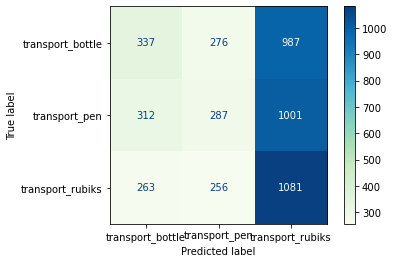

In [98]:
ConfusionMatrixDisplay.from_estimator(regressor, X_test, y_test_fixed, cmap='GnBu')

In entrambi i casi possiamo notare che l'algoritmo ha difficoltà a riconoscere i muovimenti,questo può essere dato dal fatto che il trasporto e il tocco sono molto simili e a maggior ragione lo sono le azioni di trasporto dei vari oggetti.

### ML - non supervisionato

Suddividere il dataset in due azioni, trasporto e reaching, visualizzarei due gruppi
Ritrovare i due gruppi tramite delle feature e visualizzare nuovamente il risultato

In [99]:
"""
feature = []
for i in (0,15):
    feature.append(features_df.loc[idx["rwrist", i, "transport_rubiks_cube", 0],idx[['displacement', 'frequency', 'dynamic'], ['positions', 'velocities', 'acceleration', 'jerk'], ['max_displacement', 'total_displacement', 'peak_power_density',
           'entropy_power_density', 'sum_power_density', 'maximum',
           'third_quartile', 'second_quartile', 'first_quartile', 'minimum', 'iqr',
           'ptp', 'mean', 'variance', 'standard_deviation', 'skewness',
           'kurtosis'], ['x', 'y', 'z', 'magnitude']]].explode().reset_index(drop=True)[:500])


X = np.asarray(feature).reshape(-1, 2)
"""

'\nfeature = []\nfor i in (0,15):\n    feature.append(features_df.loc[idx["rwrist", i, "transport_rubiks_cube", 0],idx[[\'displacement\', \'frequency\', \'dynamic\'], [\'positions\', \'velocities\', \'acceleration\', \'jerk\'], [\'max_displacement\', \'total_displacement\', \'peak_power_density\',\n           \'entropy_power_density\', \'sum_power_density\', \'maximum\',\n           \'third_quartile\', \'second_quartile\', \'first_quartile\', \'minimum\', \'iqr\',\n           \'ptp\', \'mean\', \'variance\', \'standard_deviation\', \'skewness\',\n           \'kurtosis\'], [\'x\', \'y\', \'z\', \'magnitude\']]].explode().reset_index(drop=True)[:500])\n\n\nX = np.asarray(feature).reshape(-1, 2)\n'

In [100]:
"""
feature = []
#for i in (0,15):
feature = features_df.loc[idx[:, :, ["transport_rubiks_cube", "touch_rubiks_cube"], [0]]] .reset_index(drop=True)

X = np.asarray(feature).reshape(-1, 2)
"""

'\nfeature = []\n#for i in (0,15):\nfeature = features_df.loc[idx[:, :, ["transport_rubiks_cube", "touch_rubiks_cube"], [0]]] .reset_index(drop=True)\n\nX = np.asarray(feature).reshape(-1, 2)\n'

In [101]:
#print(type(X))
#X = X.to_numpy()

"""
n_features = X.columns.size
n_joints = len(joints)
n_people = 16
n_actions = len(actions)
n_samples = 50

tr = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index(drop=True))
te = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index(drop=True))
y_train = np.asarray(X.loc[idx[joints, :, actions, 0]].reset_index()['action'])
y_test = np.asarray(X.loc[idx[joints, :, actions, 1]].reset_index()['action'])

y_train_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
y_test_fixed = np.zeros(shape=(n_samples * n_people * n_actions * n_joints), dtype=(np.unicode_, 16))
X_train = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)
X_test = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)


print(len(tr), len(tr[10]), n_samples, len(X_train), (n_people * n_actions),(n_joints * n_features) )

for z in range(int(len(tr))):
    for j in range(len(tr[z])):
        for i in range(n_samples):
            X_train[z, j, i] = tr[z][j][-i]
    for i in range(n_samples):
        y_train_fixed[z * n_samples + i] = y_train[z]

for z in range(int(len(te))):
    for j in range(len(te[z])):
        for i in range(n_samples):
            X_test[z, j, i] = te[z][j][-i]
    for i in range(n_samples):
        y_test_fixed[z * n_samples + i] = y_test[z]

X_train = X_train.reshape(-1, n_features)
X_test = X_test.reshape(-1, n_features)

#X_train = PCA(n_components=n_features).fit_transform(X_train)
#X_test = PCA(n_components=n_features).fit_transform(X_test)

np.where(y_train_fixed == '')
"""

joints = ['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear', 'relbow', 'reye', 'rshoulder', 'rwrist']
actions = ['transport_rubiks_cube', 'touch_rubiks_cube']

X1 = features_df.loc[idx[joints, :, actions, :], idx[['displacement']]]


n_features = X1.columns.size
n_joints = len(joints)
n_people = 16
n_actions = len(actions)
n_samples = 50


l = np.asarray(X1.loc[idx[joints, :, actions]].reset_index(drop=True))

X1 = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)

print(type(X1), "aaaaaaaaaaaa", int(len(l)), len(X1), len(l[0]), n_samples)

for z in range(len(X1)):
    for j in range(len(l[z])):
        for i in range(n_samples):
            #print(z, j, i)
            X1[z, j, i] = l[z][j][i]

print(type(X_train))
#X1 = np.concatenate((X_train,X_test))            
X1 = X1.reshape(-1, n_features)

scaler = preprocessing.StandardScaler().fit(X1)

X1 = scaler.transform(X1)



<class 'numpy.ndarray'> aaaaaaaaaaaa 715 352 8 50
<class 'numpy.ndarray'>


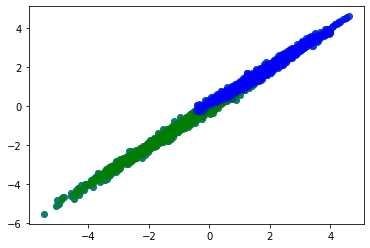

In [102]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X1)
y = kmeans.labels_
plt.scatter(X1[:,0],X1[:,1])
color = ['g','b']

for i in range(0,2):
    plt.scatter(X1[np.where(y==i),0],X1[np.where(y==i),1],color=color[i],alpha=0.3)


In [103]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

In [104]:
X_pca = pca.fit_transform(X1)
print(X_pca.shape)


(17600, 2)


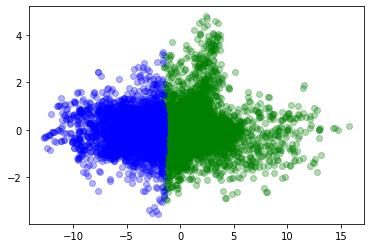

In [105]:
for i in range(0,2):
    plt.scatter(X_pca[np.where(y==i),0],X_pca[np.where(y==i),1],color=color[i],alpha=0.3)

Per capire la correttezza misuriamo l'indice di silhouette

In [106]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette(x):
    silhouette_avg = []
    for i in range(2, 16):
        kmeans = KMeans(n_clusters = i, max_iter = 20, random_state = 0)
        cluster_labels = kmeans.fit_predict(x)
        silhouette_avg.append(silhouette_score(x, cluster_labels))
        
    plt.plot(range(2, 16), silhouette_avg,'-o')
    plt.title('The silhouette method')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette coefficient') #within cluster sum of squares
    plt.show()

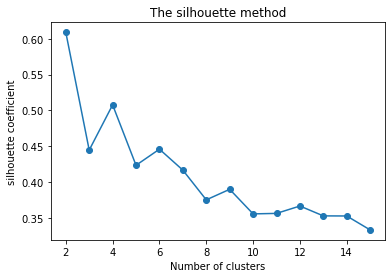

In [107]:
silhouette(X1)

Presa una azione, quella di trasporto, visualizzare l'azione per ogni persona, dopo tramite delle feature devo ritrovare i 15 gruppi che corrispondono a quell'azione per ogni persona.

['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear',
       'relbow', 'reye', 'rshoulder', 'rwrist'],
      dtype='object', name='joint')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='person')
Index(['drinking', 'eat_crisp', 'open_close_bottle', 'rubiks_cube', 'sanitise',
       'touch_bottle', 'touch_rubiks_cube', 'transport_bottle',
       'transport_pen', 'transport_rubiks_cube'],
      dtype='object', name='action')
Int64Index([0, 1, 2], dtype='int64', name='sample')

for i in range(features_df.columns.nlevels):

    print(features_df.columns.get_level_values(i).unique())

Index(['displacement', 'frequency', 'dynamic'], dtype='object', name='type_feature')
Index(['positions', 'velocities', 'acceleration', 'jerk'], dtype='object', name='data')
Index(['max_displacement', 'total_displacement', 'peak_power_density',
       'entropy_power_density', 'sum_power_density', 'maximum',
       'third_quartile', 'second_quartile', 'first_quartile', 'minimum', 'iqr',
       'ptp', 'mean', 'variance', 'standard_deviation', 'skewness',
       'kurtosis'],
      dtype='object', name='feature')
Index(['x', 'y', 'z', 'magnitude'], dtype='object', name='variable')


In [108]:
#print(type(X))
#X = X.to_numpy()
#X2 = features_df.loc[idx[:, :, ['transport_bottle']], idx[['dynamic']]]

#joints = ['lear', 'lelbow', 'leye', 'lshoulder', 'lwrist', 'nose', 'rear', 'relbow', 'reye', 'rshoulder', 'rwrist']
joints = ['rwrist', 'nose']
actions = ['transport_rubiks_cube', 'transport_bottle', 'transport_pen']


X2 = features_df.loc[idx[joints, :, actions, :], idx['displacement', 'positions', 'max_displacement', ['x', 'z']]]


n_features = X2.columns.size
n_joints = len(joints)
n_people = 16
n_actions = len(actions)
n_samples = 50

l2 = np.asarray(X2.loc[idx[joints, :, actions]].reset_index(drop=True))
#l2 = np.asarray(features_df.loc[idx[joints, :, actions]].reset_index(drop=True))

X2 = np.zeros((n_people * n_actions * n_joints, n_features, n_samples), dtype=np.float64)

print(type(X), "aaaaaaaaaaaa", int(len(l2)), len(X2), len(l2[0]), n_samples)

print(len(l2[0]))

for z in range(len(X2)):
    for j in range(len(l2[z])):
        for i in range(n_samples):
            #print(z, j, i)
            X2[z, j, i] = l2[z][j][i]

X2 = X2.reshape(-1, n_features)
print(type(X2), "bbbbbbbbbb")        

#X2 = np.concatenate((X_train, X_test))
scaler = preprocessing.StandardScaler().fit(X2)

X2 = scaler.transform(X2)

#for i in range(0,16):
#    plt.scatter(features_df.loc[idx[joints, i, actions, :],idx['displacement', 'positions', 'max_displacement', ['x', 'z']]], features_df.loc[idx[joints, i, actions, :],idx['displacement', 'positions', 'max_displacement', ['x', 'z']]])

kmeans = KMeans(n_clusters=15, random_state=0).fit(X2)

"""
feature = []
feature1.append(features_df.loc[idx["rwrist", :, "transport_rubiks_cube", 0],idx[['displacement', 'frequency', 'dynamic'], ['positions', 'velocities', 'acceleration', 'jerk'], ['max_displacement', 'total_displacement', 'peak_power_density',
    'entropy_power_density', 'sum_power_density', 'maximum',
    'third_quartile', 'second_quartile', 'first_quartile', 'minimum', 'iqr',
    'ptp', 'mean', 'variance', 'standard_deviation', 'skewness',
    'kurtosis'], ['x', 'y', 'z', 'magnitude']]].explode().reset_index(drop=True)[:500])


X = np.asarray(feature).reshape(-1, 2)
"""

<class 'pandas.core.frame.DataFrame'> aaaaaaaaaaaa 194 96 2 50
2
<class 'numpy.ndarray'> bbbbbbbbbb


'\nfeature = []\nfeature1.append(features_df.loc[idx["rwrist", :, "transport_rubiks_cube", 0],idx[[\'displacement\', \'frequency\', \'dynamic\'], [\'positions\', \'velocities\', \'acceleration\', \'jerk\'], [\'max_displacement\', \'total_displacement\', \'peak_power_density\',\n    \'entropy_power_density\', \'sum_power_density\', \'maximum\',\n    \'third_quartile\', \'second_quartile\', \'first_quartile\', \'minimum\', \'iqr\',\n    \'ptp\', \'mean\', \'variance\', \'standard_deviation\', \'skewness\',\n    \'kurtosis\'], [\'x\', \'y\', \'z\', \'magnitude\']]].explode().reset_index(drop=True)[:500])\n\n\nX = np.asarray(feature).reshape(-1, 2)\n'

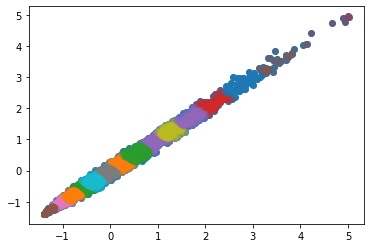

In [109]:
y = kmeans.labels_
plt.scatter(X2[:,0],X2[:,1])
#color = ['g','b']

for i in range(0,16):
    plt.scatter(X2[np.where(y==i),0],X2[np.where(y==i),1],alpha=0.3)

In [110]:
pca = decomposition.PCA(n_components=2)

In [111]:
X_pca = pca.fit_transform(X2)
print(X_pca.shape)


(4800, 2)


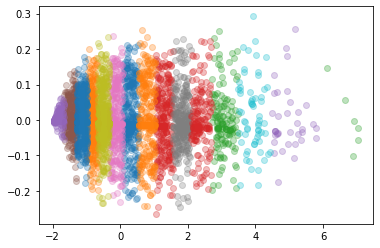

In [112]:
for i in range(0,16):
    plt.scatter(X_pca[np.where(y==i),0],X_pca[np.where(y==i),1],alpha=0.3)

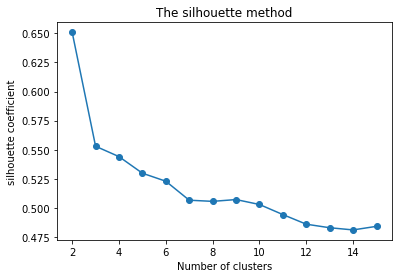

In [113]:
silhouette(X2)

In [114]:
print(sklearn.__version__)

#%pip install -U scikit-learn

1.1.1


In [115]:
"""

SyntaxError: EOF while scanning triple-quoted string literal (969763094.py, line 1)

In [ ]:
feature2 = []
for i in (0,15):
    feature2.append(features_df.loc[idx["rwrist", i, "touch_rubiks_cube", 0],idx[['displacement', 'frequency', 'dynamic'], ['positions', 'velocities', 'acceleration', 'jerk'], ['max_displacement', 'total_displacement', 'peak_power_density',
           'entropy_power_density', 'sum_power_density', 'maximum',
           'third_quartile', 'second_quartile', 'first_quartile', 'minimum', 'iqr',
           'ptp', 'mean', 'variance', 'standard_deviation', 'skewness',
           'kurtosis'], ['x', 'y', 'z', 'magnitude']]].explode().reset_index(drop=True)[:500])


X = np.asarray(feature2).reshape(-1, 2)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
y = kmeans.labels_
plt.scatter(X[:,0],X[:,1])
color = ['g','b']

for i in range(0,2):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1],color=color[i],alpha=0.3)

In [ ]:
X_pca = pca.fit_transform(X)
print(X_pca.shape)

In [ ]:
for i in range(0,2):
    plt.scatter(X_pca[np.where(y==i),0],X_pca[np.where(y==i),1],color=color[i],alpha=0.3)

In [ ]:
silhouette(X)

Presa una azione, quella di trasporto, visualizzare l'azione per ogni persona, dopo tramite delle feature devo ritrovare i 15 gruppi che corrispondono a quell'azione per ogni persona.

In [ ]:
import csv 
    
# field names 
fields = ['pearsonID', 'displacement', 'frequency', 'dynamic', 'positions', 'velocities', 'acceleration', 'jerk',
           'max_displacement', 'total_displacement', 'peak_power_density',
           'entropy_power_density', 'sum_power_density', 'maximum',
           'third_quartile', 'second_quartile', 'first_quartile', 'minimum', 'iqr',
           'ptp', 'mean', 'variance', 'standard_deviation', 'skewness',
           'kurtosis', 'x', 'y', 'z', 'magnitude'
         ]
    
# data rows of csv file

rows = []
"""
for i in range (features_df.columns.nlevels):
    rows.append(np.where(features_df.index.get_level_values(0)=="rwrist") and np.where(features_df.index.get_level_values(2)=="touch_rubiks_cube") and features_df.columns.get_level_values(i))
"""
for i in (0,15):
    rows.append(features_df.loc[idx["rwrist", i, "touch_rubiks_cube", 0]].explode().reset_index(drop=True))

"""
rows = features_df.loc[
    idx["rwrist", :, "transport_rubiks_cube", :],
    idx['displacement', 'positions', 'total_displacement', 'magnitude']
].explode().reset_index(drop=True)[:500]
"""
print(rows)
    
# name of csv file 
filename = "transport_rb.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(np.array(rows))

In [ ]:
transport_rb = pd.read_csv('transport_rb.csv')
transport_rb.head()


In [ ]:
#features_df

feature_df = pd.read_parquet(features)
feature_df.to_csv('feature_df.csv')

In [ ]:
"""